# Spin Boson Model Examples

### Mean Field calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import SpinBoson # import model class 
from qc_lab.algorithms import MeanField # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver


100%|██████████| 3001/3001 [00:00<00:00, 3523.67it/s]


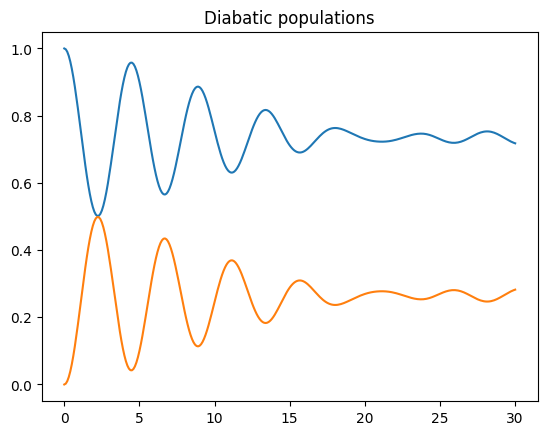

In [ ]:

sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = SpinBoson({
    'V':0.5,
    'E':0.5,
    'A':100,
    'W':0.1,
    'l_reorg':0.005,
    'boson_mass':1.0,
    'temp':1.0,

})
sim.algorithm = MeanField()

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = serial_driver(sim)

normalize = (sim.settings.num_trajs)
plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db']))/normalize)
plt.title('Diabatic populations')
plt.show()

### Surface Hopping Calculations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import SpinBoson # import model class 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver

#### Stochastic sampling

100%|██████████| 3001/3001 [00:00<00:00, 3001.13it/s]


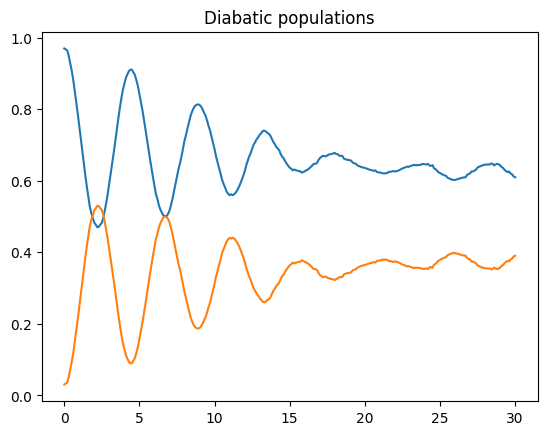

In [ ]:
sim = Simulation()

sim.settings.num_trajs = 205
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = SpinBoson({
    'V':0.5,
    'E':0.5,
    'A':100,
    'W':0.1,
    'l_reorg':0.005,
    'boson_mass':1.0,
    'temp':1.0,

})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':False,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = serial_driver(sim)

normalize = (sim.settings.num_trajs)
plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db']))/normalize)
plt.title('Diabatic populations')
plt.show()

#### Deterministic sampling

To use deterministic sampling we multiply the number of trajectories and batch size by the number of states. Note that the convergence behavior changes.

/home/akrotz/Research/qc_lab/qc_lab/dynamics/serial_driver.py:27: UserWarning: Setting sim.settings.num_trajs to the number of provided seeds.
  warnings.warn(
100%|██████████| 3001/3001 [00:00<00:00, 3089.78it/s]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


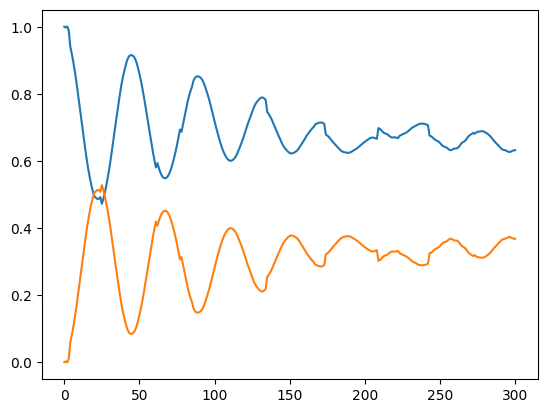

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


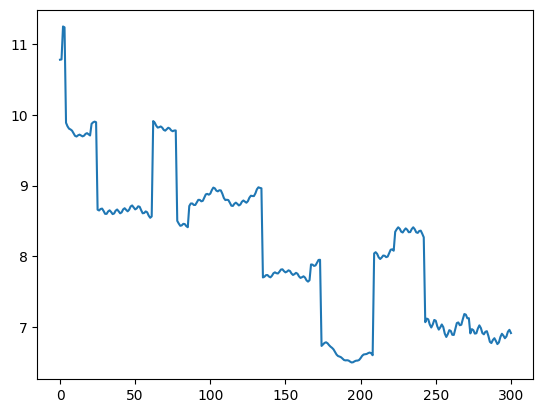

In [ ]:
sim = Simulation()

## batch_size and num_trajs both have to be integer multiples of the num_quantum_states but num_trajs does not have to be an integer multiple 
## of the batch_size.

sim.settings.num_trajs = 21*2
sim.settings.batch_size = 5*2
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = SpinBoson({
    'V':0.5,
    'E':0.5,
    'A':100,
    'W':0.1,
    'l_reorg':0.005,
    'boson_mass':1.0,
    'temp':1.0,
})

sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0
#old_seeds = 
data = serial_driver(sim, seeds = np.arange(sim.settings.num_trajs, dtype=int)+0)
print(data.data_dict['seed'])
# for deterministic surface hopping the normalization is different
normalize = (sim.settings.num_trajs/sim.model.constants.num_quantum_states)
plt.plot(np.real(np.einsum('tii->ti',data.data_dict['dm_db']))/normalize)
plt.show()
print(data.data_dict['seed'])
plt.plot(data.data_dict['quantum_energy'])

### Using a parllel driver

We will parallelize the above deterministic surface hopping calculation over four tasks.

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. nan nan nan nan nan nan nan nan]]
10
10
10
10
2
[(<qc_lab.simulation.Simulation object at 0x74dfb9fde290>, <qc_lab.vector.Vector object at 0x74dfb9f9b430>, <qc_lab.vector.Vector object at 0x74dfb9eaef20>, <qc_lab.data.Data object at 0x74dfb9e76590>), (<qc_lab.simulation.Simulation object at 0x74dfb9e74280>, <qc_lab.vector.Vector object at 0x74dfb9e741c0>, <qc_lab.vector.Vector object at 0x74dfb9ef4160>, <qc_lab.data.Data object at 0x74dfb9e74220>), (<qc_lab.simulation.Simulation object at 0x74dfb9e76b30>, <qc_lab.vector.Vector object at 0x74dfb9e76110>, <qc_lab.vector.Vector object at 0x74dfb9e74760>, <qc_lab.data.Data object at 0x74dfb9e74730>), (<qc_lab.simulation.Simulation object at 0x74dfb9e768f0>, <qc_lab.vector.Vector object at 0x74dfb9ef4190>, <qc_lab.vector.Vector object at 0x74dfb9e24670>, <qc_lab

100%|██████████| 3001/3001 [00:01<00:00, 2759.31it/s]


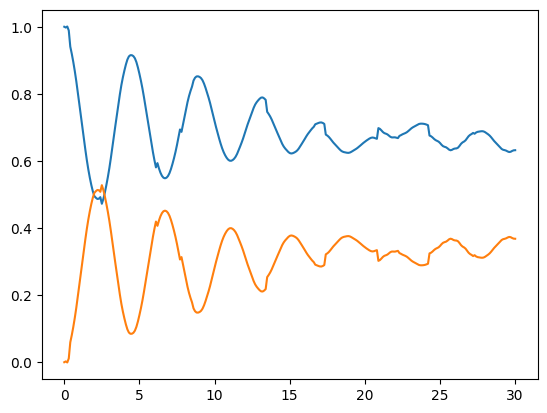

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


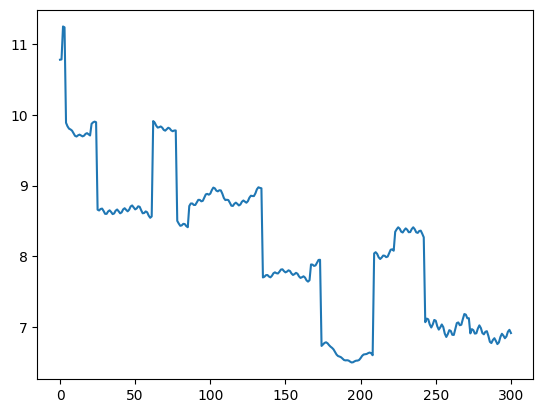

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import SpinBoson # import model class 
from qc_lab.algorithms import MeanField # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver
import numpy as np
import matplotlib.pyplot as plt
from qc_lab import Simulation # import simulation class 
from qc_lab.models import SpinBoson # import model class 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping # import algorithm class 
from qc_lab.dynamics import serial_driver # import dynamics driver


from qc_lab.dynamics import parallel_driver_multiprocessing # import dynamics driver

sim = Simulation()

sim.settings.num_trajs = 21*2
sim.settings.batch_size = 5*2
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = SpinBoson({
    'V':0.5,
    'E':0.5,
    'A':100,
    'W':0.1,
    'l_reorg':0.005,
    'boson_mass':1.0,
    'temp':1.0,

})

sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = parallel_driver_multiprocessing(sim, num_tasks=4)

# for deterministic surface hopping the normalization is different
normalize = (sim.settings.num_trajs/sim.model.constants.num_quantum_states)
plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db']))/normalize)
plt.show()
print(data.data_dict['seed'])
plt.plot(data.data_dict['quantum_energy'])

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. nan nan]]
4
4
4
4
2
[(<qc_lab.simulation.Simulation object at 0x74dfbae727a0>, <qc_lab.vector.Vector object at 0x74dfbae71e70>, <qc_lab.vector.Vector object at 0x74dfbaeb82b0>, <qc_lab.data.Data object at 0x74dfbae71f60>), (<qc_lab.simulation.Simulation object at 0x74dfbae0b490>, <qc_lab.vector.Vector object at 0x74dfbae0a710>, <qc_lab.vector.Vector object at 0x74dfb9f172e0>, <qc_lab.data.Data object at 0x74dfbae08e80>), (<qc_lab.simulation.Simulation object at 0x74dfba2e1bd0>, <qc_lab.vector.Vector object at 0x74dfbae084f0>, <qc_lab.vector.Vector object at 0x74dfbae72620>, <qc_lab.data.Data object at 0x74dfba2e3160>), (<qc_lab.simulation.Simulation object at 0x74dfba2e2740>, <qc_lab.vector.Vector object at 0x74dfba2e19c0>, <qc_lab.vector.Vector object at 0x74dfbae0aaa0>, <qc_lab.data.Data object at 0x74dfba2e0670>), (<qc_lab.simulation.Simulation object at 0x74dfba2e37c0>, <qc_lab.vector.Vector objec

100%|██████████| 3001/3001 [00:01<00:00, 2083.79it/s]


9.0


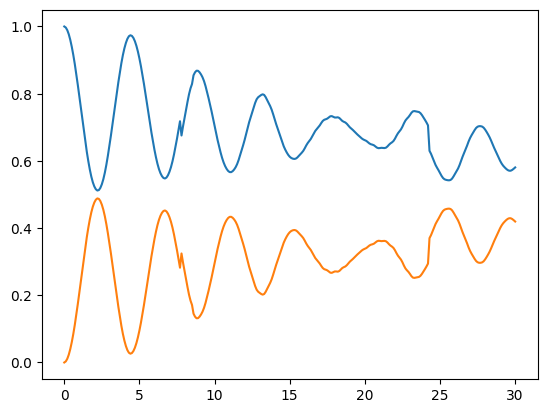

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


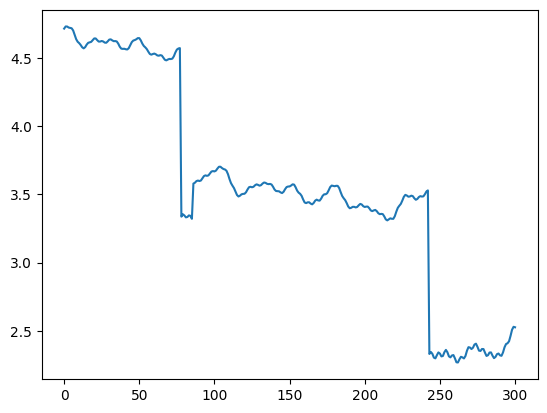

In [ ]:
from qc_lab.dynamics import parallel_driver_multiprocessing # import dynamics driver

sim = Simulation()

sim.settings.num_trajs = 9*2
sim.settings.batch_size = 2*2
sim.settings.tmax = 30
sim.settings.dt = 0.01

sim.model = SpinBoson({
    'V':0.5,
    'E':0.5,
    'A':100,
    'W':0.1,
    'l_reorg':0.005,
    'boson_mass':1.0,
    'temp':1.0,

})
sim.algorithm = FewestSwitchesSurfaceHopping({
    'fssh_deterministic':True,
    'gauge_fixing':0
})

sim.state.wf_db= np.zeros((sim.model.constants.num_quantum_states), dtype=complex)
sim.state.wf_db[0] += 1.0

data = parallel_driver_multiprocessing(sim, num_tasks=4)

# for deterministic surface hopping the normalization is different
normalize = (sim.settings.num_trajs/sim.model.constants.num_quantum_states)
print(normalize)
plt.plot(sim.settings.tdat_output, np.real(np.einsum('tii->ti',data.data_dict['dm_db']))/normalize)
plt.show()
print(data.data_dict['seed'])
plt.plot(data.data_dict['quantum_energy'])
plt.show()